Text(0, 0.5, 'Loss')

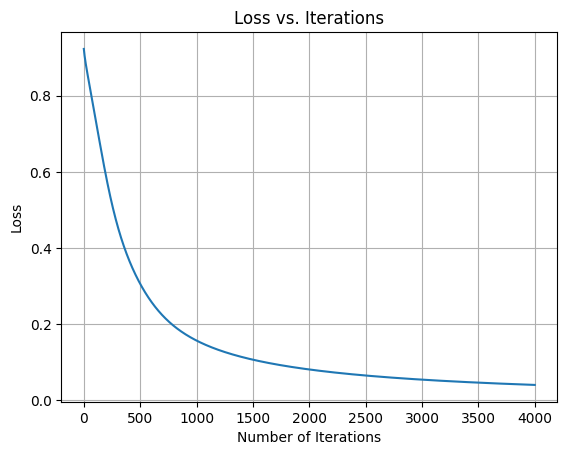

In [22]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

def forward_propagation(W1, W2):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y_pred = sigmoid(a2)
    return a1, z1, a2, y_pred

def compute_cost(y_pred):
    J = 0.5 * sum((y - y_pred) ** 2)
    return J

def backward_propagation(y_pred, z2, a1, z1):
    delta2 = np.multiply(-(y - y_pred), sigmoid_derivative(z2))
    dJ_dW2 = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1)
    dJ_dW1 = np.dot(X.T, delta1)
    return dJ_dW1, dJ_dW2

X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

y = np.array([[0], [1], [0], [1], [0], [1], [1], [1]])

input_no = 3
output_no = 1
hidden_no = 5

W1 = np.random.randn(input_no, hidden_no)
b1 = np.ones([1, hidden_no])

W2 = np.random.randn(hidden_no, output_no)
b2 = np.ones([1, output_no])

alpha = 0.05
num_iterations = 4000

cost =[]

for i in range(num_iterations):
    z1, a1, z2, y_pred = forward_propagation(W1, W2)
    dJ_dW1, dJ_dW2 = backward_propagation(y_pred, z2, a1, z1)

    W1 = W1 - (alpha * dJ_dW1)
    W2 = W2 - (alpha * dJ_dW2)

    c = compute_cost(y_pred)
    cost.append(c)

plt.grid() 
plt.plot(range(num_iterations), cost)
plt.title('Loss vs. Iterations') 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss')

In [23]:
print(W1)
print(W1.shape)
print('\n --------------------------- \n')
print(W2)
print(W2.shape)

[[ 0.35804453 -0.12412487 -1.65202721  0.3959066  -0.94265997]
 [ 0.31251618  1.14592895 -0.87344094  0.57599825 -1.56775669]
 [ 1.14534353  1.1374641  -3.69435494 -0.89359889 -3.15952667]]
(3, 5)

 --------------------------- 

[[ 1.27385592]
 [ 1.80698964]
 [-6.33837307]
 [-0.03294133]
 [-5.64569585]]
(5, 1)
